### Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

In [23]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
x,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 5                  5.4               3.9                1.7               0.4
 6                  4.6               3.4                1.4               0.3
 7                  5.0               3.4                1.5               0.2
 8                  4.4               2.9                1.4               0.2
 9                  4.9               3.1                1.5               0.1
 10                 5.4               3.7                1.5               0.2
 11                 4.8               3.4           

Text(0.5, 1.0, 'Petal')

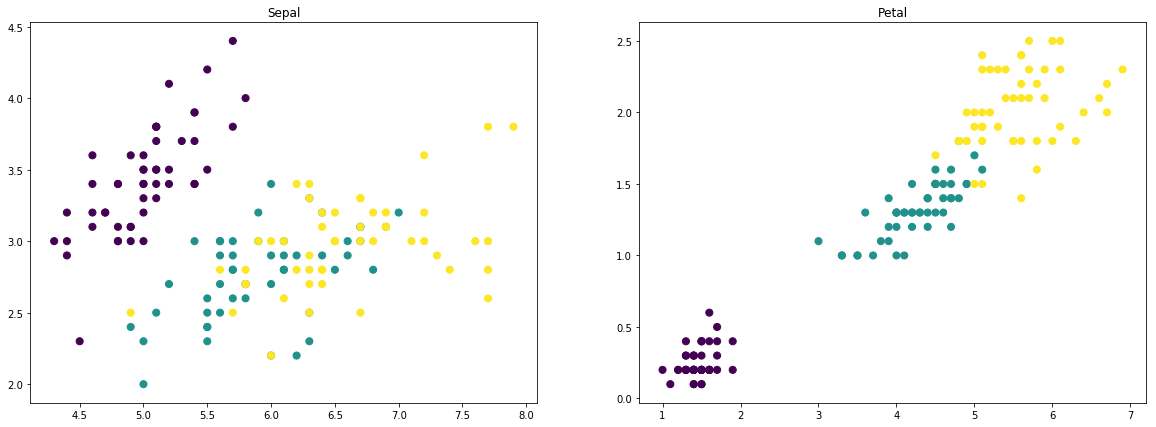

In [24]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=y, s=50)
plt.title('Sepal')

plt.subplot(1, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y, s=50)
plt.title('Petal')

In [25]:
model = KMeans(n_clusters=3)

model.fit(x)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, 'KMeans Clusters')

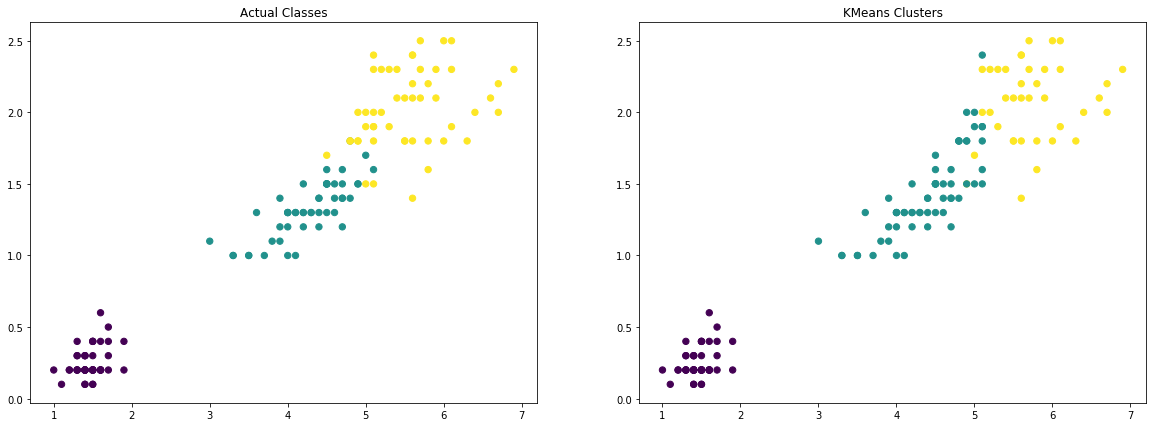

In [26]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y, s=40)
plt.title('Actual Classes')

plt.subplot(1, 2, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=model.labels_, s=40)
plt.title('KMeans Clusters')


In [27]:
accuracy_score(y, model.labels_)

0.8933333333333333

## EM Algorithm

In [28]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=3) # Instantiate and fit the model

In [29]:
GMM.fit(x)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
gmm_clusters = GMM.predict(x)

gmm_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Text(0.5, 1.0, 'EM Clusters')

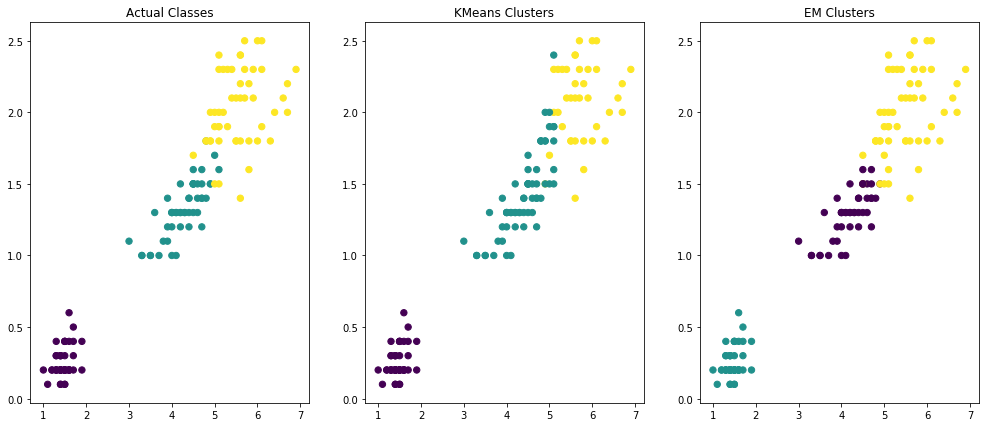

In [31]:
plt.figure(figsize=(17,7))

plt.subplot(1, 3, 1)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=y, s=40)
plt.title('Actual Classes')

plt.subplot(1, 3, 2)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=model.labels_, s=40)
plt.title('KMeans Clusters')

plt.subplot(1, 3, 3)
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=gmm_clusters, s=40)
plt.title('EM Clusters')


In [32]:
accuracy_score(y, gmm_clusters)

0.3333333333333333